In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
heart_data = pd.read_csv('heart.csv')

In [21]:
heart_data.duplicated().sum()

723

In [22]:
print(f"Original dataset shape: {heart_data.shape}")
heart_data_unique = heart_data.drop_duplicates()
print(f"Dataset shape after removing duplicates: {heart_data_unique.shape}")
print(f"Number of duplicate rows removed: {heart_data.shape[0] - heart_data_unique.shape[0]}")
heart_data = heart_data_unique.copy()
heart_data = heart_data.reset_index(drop = True)

Original dataset shape: (1025, 14)
Dataset shape after removing duplicates: (302, 14)
Number of duplicate rows removed: 723


In [23]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


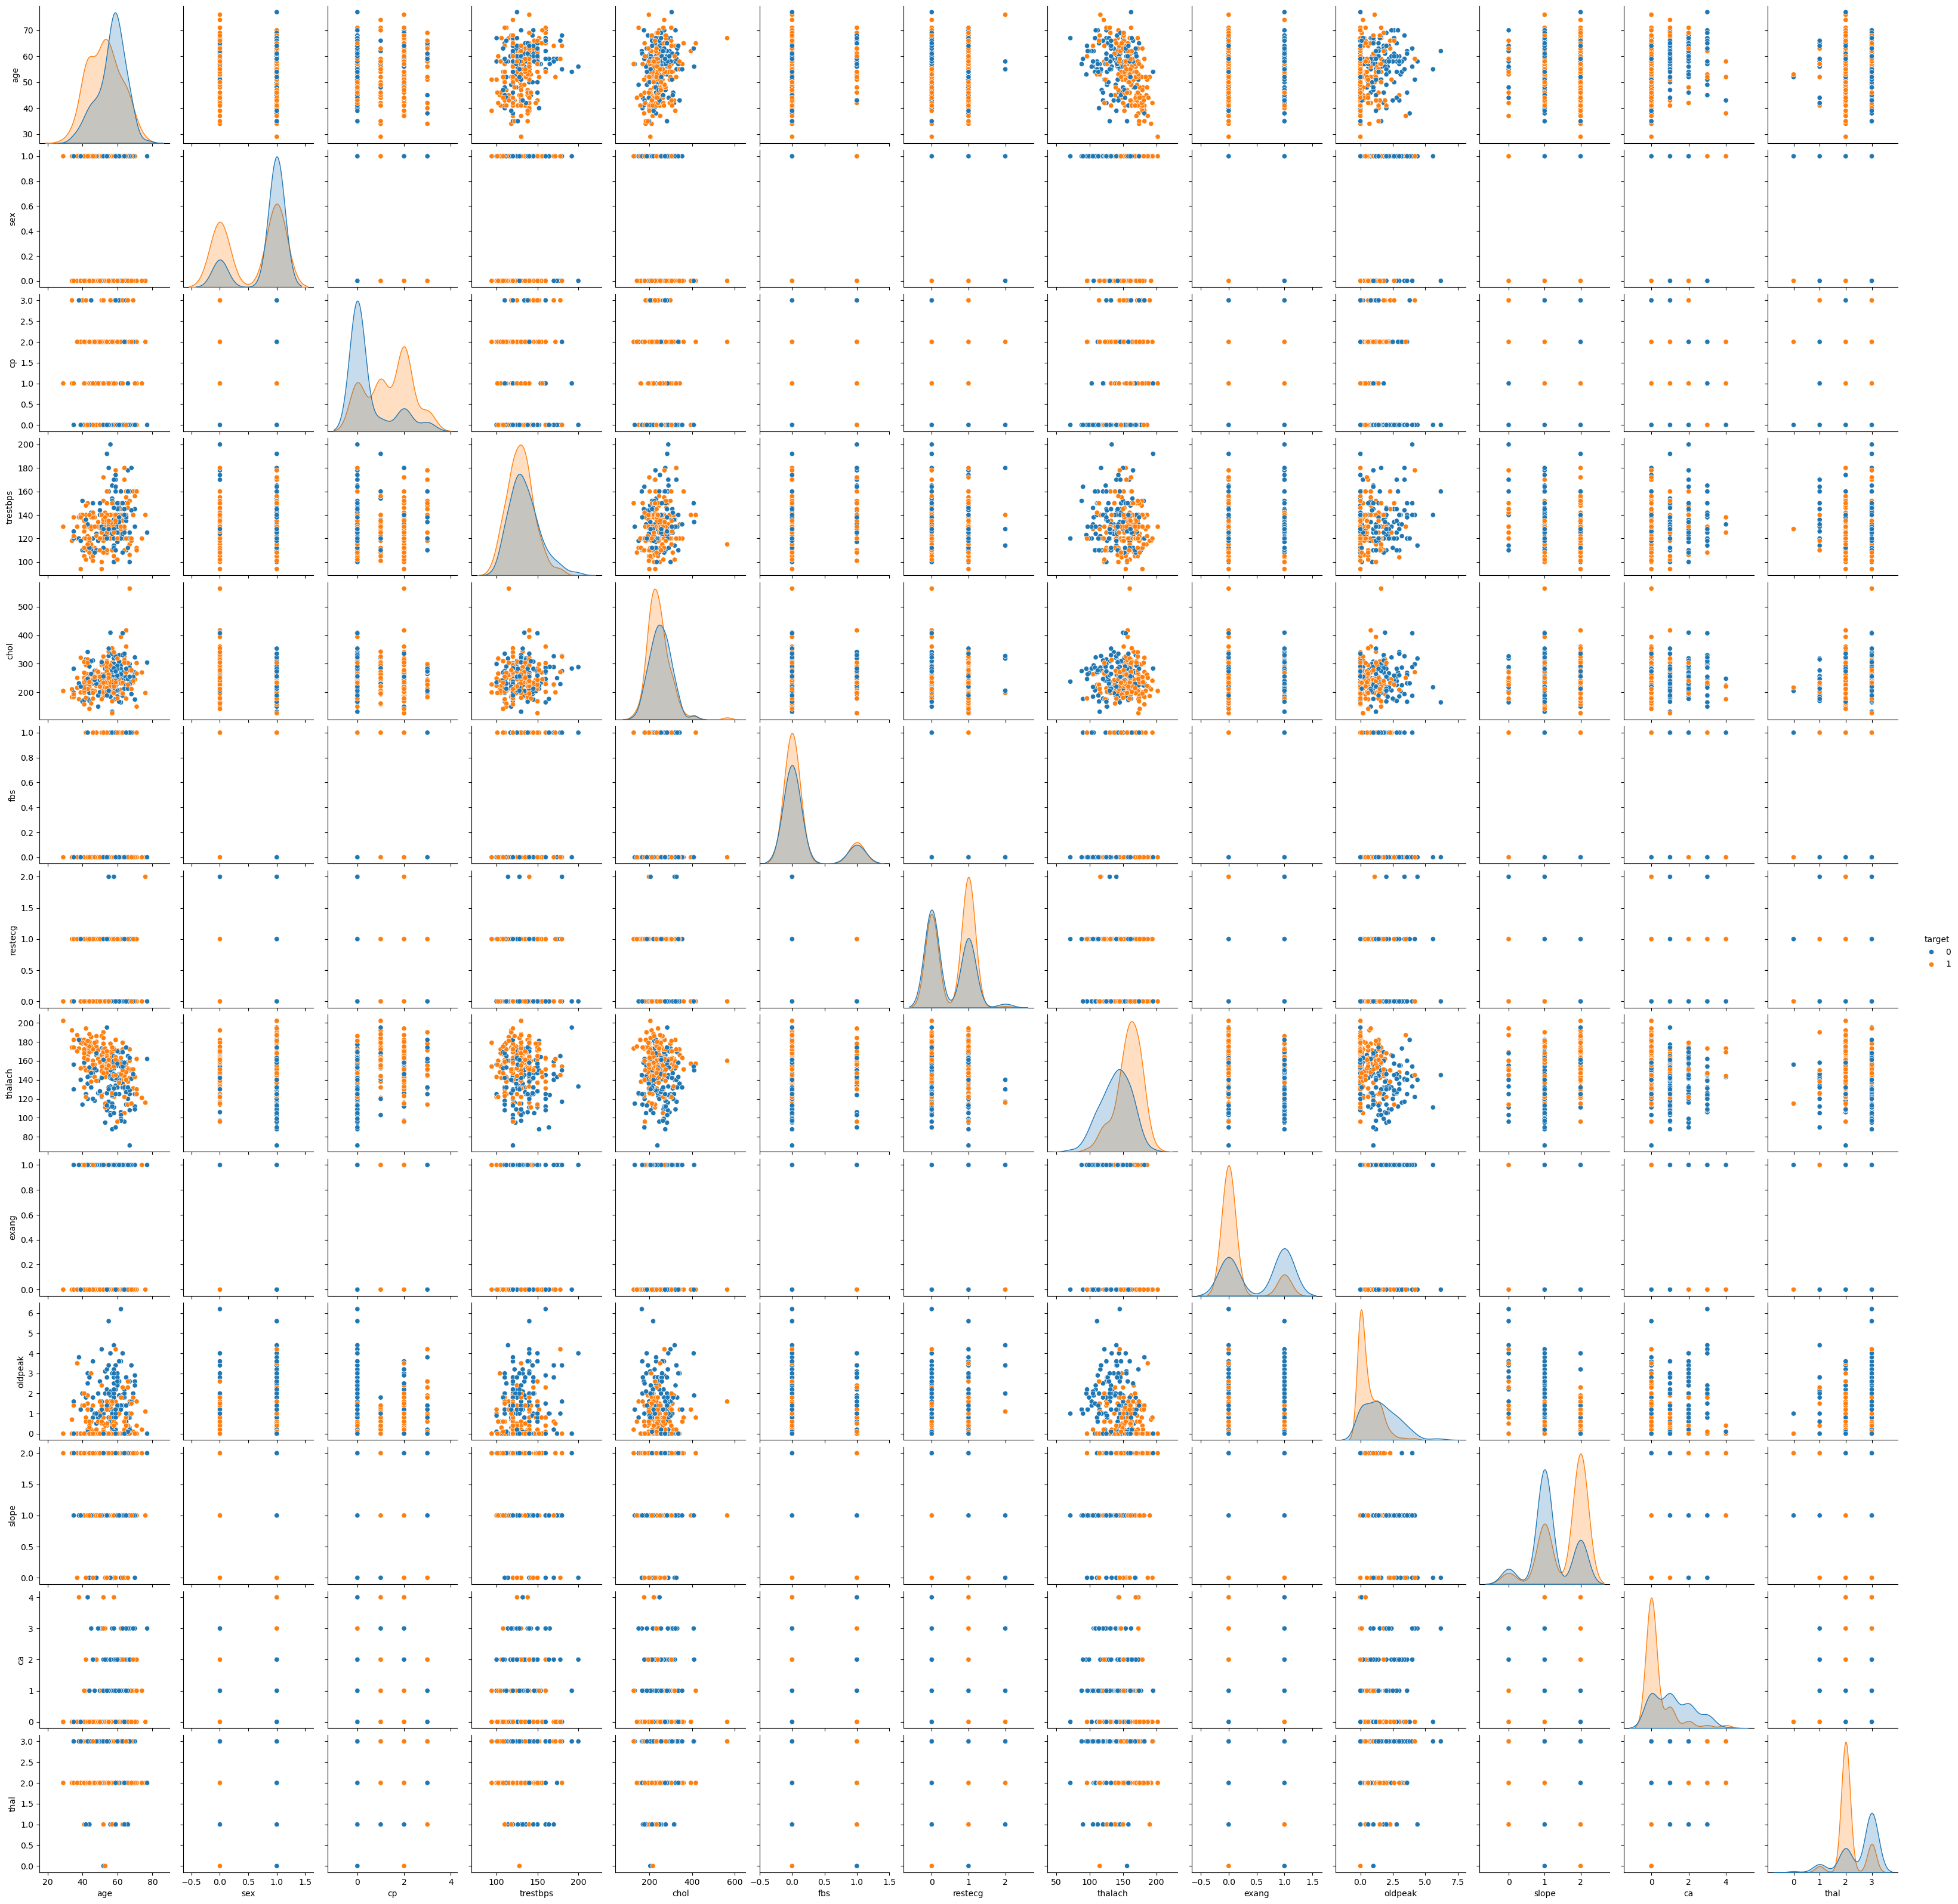

In [25]:
sns.pairplot(heart_data, hue = 'target')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = heart_data.drop('target', axis = 1)
y = heart_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
# since there are only numerical columns and no missing values we can just normalise the data and proceed

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
final_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
heart_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)
heart_model.fit(final_X_train, y_train)
predictions = heart_model.predict(final_X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[28  5]
 [ 8 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.88      0.81      0.84        43

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [31]:
heart_data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
heart_model_lg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1)
heart_model_lg.fit(final_X_train, y_train)
predictions = heart_model_lg.predict(final_X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[28  5]
 [ 8 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.88      0.81      0.84        43

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

